In [1]:
import pandas as pd
from COMETH import Skeleton,DynamicSkeleton
from COMETH.DynamicSkeleton import Kalman
import nimblephysics as nimble
import numpy as np
import time
import matplotlib.pyplot as plt
import os
gui = nimble.NimbleGUI()
gui.serve(8080)
# sudo lsof -iTCP:8080 -sTCP:LISTEN

GUIWebsocketServer will start serving a WebSocket server on ws://localhost:8070
Error listening! websocketpp.transport.asio:3
GUIWebsocketServer called stopServing() while we're in the middle of booting the server. Waiting until booting finished...


[2026-01-08 16:20:47] [info] asio listen error: asio.system:98 (Address already in use)


OSError: [Errno 98] Address already in use

In [ ]:
gui.nativeAPI().clear()
# Build skeleton
s12 = Skeleton('BODY12.xml')
# BSM
s = DynamicSkeleton(config='BODY15_constrained_3D.xml',osim_file=os.path.abspath('COMETH/bsm.osim'))
s.hip_correction = False

# plot xyz axis
axis_length=0.2
gui.nativeAPI().createLine(key='x_axis',points=[np.array([0,0,0]),np.array([axis_length,0,0])],color=np.array([255,0,0,1]))
gui.nativeAPI().createLine(key='y_axis',points=[np.array([0,0,0]),np.array([0,axis_length,0])],color=np.array([0,255,0,1]))
gui.nativeAPI().createLine(key='z_axis',points=[np.array([0,0,0]),np.array([0,0,axis_length])],color=np.array([0,0,255,1]))

# Read data from CSV
markers = pd.read_csv("tmp/imu/vicon_s1_acting1.csv")

# Build the markers dataframe with only the subset we are interested in
Rz = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1]
])

Rx = np.array([
    [1,0,0 ],
    [0,0,-1 ],
    [0,1,0]
])

markers.columns
markers_dict = {
'RKnee': 'right_knee',
'LWrist': 'left_wrist',
'RHip': 'right_hip',
'RShoulder': 'right_shoulder',
'LElbow': 'left_elbow',
'LHip': 'left_hip',
'RElbow': 'right_elbow',
'RWrist': 'right_wrist',
'LKnee': 'left_knee',
'LShoulder': 'left_shoulder',
'RAnkle': 'right_ankle',
'LAnkle': 'left_ankle'
 }
target = []
for i in range(markers.shape[0]):
    row = []
    for kp in markers_dict.keys():
        p = np.array([markers[markers_dict[kp]+"_x"][i],markers[markers_dict[kp]+"_y"][i],markers[markers_dict[kp]+"_z"][i]])
        # rotate the 3d point -90 on the x axis (from y up to z up)
        p_n = Rz.dot(Rx.dot(p))
        # print(p,p_n)
        row += p_n.tolist()
    target.append(row)
target = np.array(target)

# Move the body model using gt to the first position
kps = list(markers_dict.keys())
s.reset()
s12.load_from_numpy(target[0,:].reshape(-1,3),s.kps)
s.load_from_BODY12(s12)
s.exact_scale()
gui.nativeAPI().renderSkeleton(s._nimble)

Setting len to 0.1
Setting neutral pos to   0
0.7
  0
Setting len to 0.3
Setting neutral pos to    0
-0.6
   0
Setting len to 0.1
Setting neutral pos to   0
0.2
  0


127.0.0.1 - - [02/Dec/2025 16:36:07] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 16:36:07] "GET /v1/health HTTP/1.1" 404 -


#### Q without KF

In [3]:
s = DynamicSkeleton(config='BODY15_constrained_3D.xml',osim_file=os.path.abspath('COMETH/bsm.osim'))
s.hip_correction = False
s12.load_from_numpy(target[0,:].reshape(-1,3),s.kps)
s.load_from_BODY12(s12)
s.exact_scale()
        
# Move the body model using gt and exact qpik, following input from totalcapture
kps = list(markers_dict.keys())

kf = None

# For stats
Q_es = []

for i in range(target.shape[0]):
    s12.load_from_numpy(target[i,:].reshape(-1,3),s.kps)
    s.load_from_BODY12(s12)
    
    # IK
    s.exact_scale(to_scale=False, max_iterations=100)

    # Kalman to estimate velocity and acceleration
    q = s._nimble.getPositions()

    Q_es.append(q)

    gui.nativeAPI().renderSkeleton(s._nimble)
    
s.reset_history()
Q_es = np.array(Q_es)

127.0.0.1 - - [02/Dec/2025 16:36:24] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 16:36:24] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 16:36:37] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 16:36:37] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 16:36:54] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 16:36:54] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 16:37:07] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 16:37:07] "GET /v1/health HTTP/1.1" 404 -


127.0.0.1 - - [02/Dec/2025 16:37:24] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 16:37:24] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 16:37:37] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 16:37:37] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 16:37:54] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 16:37:54] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 16:38:07] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 16:38:07] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 16:38:24] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 16:38:24] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 16:38:37] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 16:38:37] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 16:38:54] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 16:38:54] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 

#### Q, Qdot, Qdotdot with KF

In [5]:
# Move the body model using gt and exact qpik, following input from totalcapture
s = DynamicSkeleton(config='BODY15_constrained_3D.xml',osim_file=os.path.abspath('COMETH/bsm.osim'))
s.hip_correction = False
s12.load_from_numpy(target[0,:].reshape(-1,3),s.kps)
s.load_from_BODY12(s12)
s.exact_scale()

kps = list(markers_dict.keys())
        
kf = None

# For stats
Q = []
Q_dot = []
Q_dotdot = []

for i in range(target.shape[0]):
    s12.load_from_numpy(target[i,:].reshape(-1,3),s.kps)
    s.load_from_BODY12(s12)
    
    # IK
    s.exact_scale(to_scale=False, max_iterations=100)

    # Kalman to estimate velocity and acceleration
    q   = s._nimble.getPositions()
    qd  = np.zeros(q.shape)
    qdd = np.zeros(q.shape)
    if kf is None:
        kf = [Kalman(0.03,q[i],0.01) for i in range(q.shape[0])]
    [kf.predict() for kf in kf]
    for i in range(len(kf)):
        q[i]   = kf[i].update(q[i],minval=s.q_l[i],maxval=s.q_u[i], R = 0.1)
        qd[i]  = kf[i].X[1]
        qdd[i] = kf[i].X[2]

    s._nimble.setPositions(q)

    Q.append(q)
    Q_dot.append(qd)
    Q_dotdot.append(qdd)

    gui.nativeAPI().renderSkeleton(s._nimble)
    
s.reset_history()
Q = np.array(Q)
Q_dot = np.array(Q_dot)
Q_dotdot = np.array(Q_dotdot)

127.0.0.1 - - [25/Nov/2025 14:46:40] code 404, message File not found
127.0.0.1 - - [25/Nov/2025 14:46:40] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [25/Nov/2025 14:47:10] code 404, message File not found
127.0.0.1 - - [25/Nov/2025 14:47:10] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [25/Nov/2025 14:47:40] code 404, message File not found
127.0.0.1 - - [25/Nov/2025 14:47:40] "GET /v1/health HTTP/1.1" 404 -


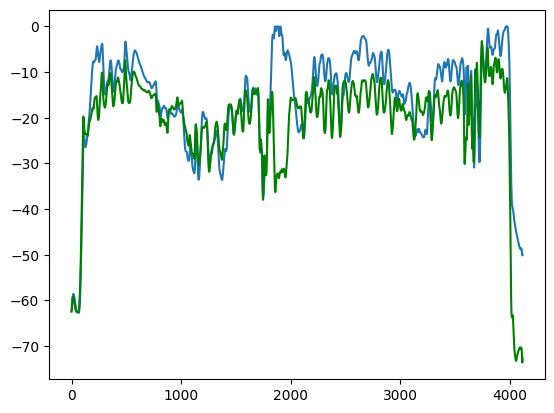

In [6]:
import matplotlib.pyplot as plt
# print(qs_imu[32])
# print(qs[32])
plt.plot(np.degrees(Q[:,32]), label = "kf")
plt.plot(np.degrees(Q_es[:,32]), label = "exact scale", color='green')
plt.show()

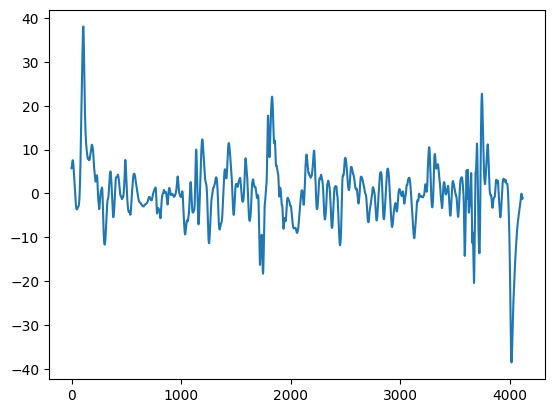

127.0.0.1 - - [25/Nov/2025 14:48:10] code 404, message File not found
127.0.0.1 - - [25/Nov/2025 14:48:10] "GET /v1/health HTTP/1.1" 404 -


In [7]:
import matplotlib.pyplot as plt
# print(qs_imu[32])
# print(qs[32])
plt.plot(np.degrees(Q_dot[:,32]), label = "kf")
plt.show()

In [ ]:
M = s._nimble.getMassMatrix()                   # Matrice di massa-inerzia M(q). Rappresenta la resistenza del robot ad essere accelerato. È simmetrica e definita positiva. 
G = s._nimble.getGravityForces()                # Il vettore G(q). Rappresenta le coppie necessarie per sostenere il robot contro la gravità se fosse fermo. Utilizzo: Fondamentale. Se vuoi sottrarre il peso del corpo dai calcoli.
C = s._nimble.getCoriolisForces()               # C(q) include le forze centrifughe e di Coriolis. Utilizzo: Importante per movimenti veloci (corsa, bracciate rapide). Esiste solo se qd != 0
H = s._nimble.getCoriolisAndGravityForces()     # Vettore somma H=C+G. È spesso chiamato "Bias Force Vector". Utilizzo: Consigliato. Invece di chiamare le due funzioni sopra separatamente e sommarle, usa questa. È computazionalmente più efficiente e ti dà tutto ciò che devi compensare prima di applicare accelerazioni.



# w = s._nimble.getMass()                         # Massa in kg della persona, la somma di LinkMasses (Utile per sanity check)
# d = s._nimble.getLinkMasses()                   # massa in Kg di ogni singolo segmento (24,) 
# d = s._nimble.getMultipleContactInverseDynamics()                 # Given accelerations, contactBodies, bodyWrenchGuesses
# # inutili?
# d = s._nimble.getInverseDynamicsFromPredictions()        # Given accelerations, contactBodies, rootFrameContactWrench, rootResiduals
# d = s._nimble.getMultipleContactInverseDynamicsOverTime()                 # Given accelerations, contactBodies, bodyWrenchGuesses
# d = s._nimble.getInverseDynamics(qdd)        # (49,) when feeding with (49,) acceleration vector
# d = s._nimble.getGroupMasses()                # (24,), probabilmente coincide con getLinkMasses
# d = s._nimble.getGroupInertias()                # (144,) -> 24 * 6 ? idem per getLinkIntertias
# d = s._nimble.getAugMassMatrix()                    # Serve al motore interno per fare l'integrazione temporale stabile. Probabilmente non serve.
# d = s._nimble.getInvMassMatrix()             # (49,49) filled with nans -> inversa della matrice di massa
# d = s._nimble.getExternalForces()               # tau_ext: Sono le forze esterne (spinte, urti) proiettate nello spazio dei giunti. Nulle se non impostate
# d = s._nimble.getLinearizedMasses()        # (25,) boh

TypeError: getWorldJacobian(): incompatible function arguments. The following argument types are supported:
    1. (self: nimblephysics_libs._nimblephysics.dynamics.Skeleton, node: nimblephysics_libs._nimblephysics.dynamics.JacobianNode) -> numpy.ndarray[numpy.float64[6, n]]
    2. (self: nimblephysics_libs._nimblephysics.dynamics.Skeleton, node: nimblephysics_libs._nimblephysics.dynamics.JacobianNode, localOffset: numpy.ndarray[numpy.float64[3, 1]]) -> numpy.ndarray[numpy.float64[6, n]]

Invoked with: <nimblephysics_libs._nimblephysics.dynamics.Skeleton object at 0x761343fc6a30>

127.0.0.1 - - [25/Nov/2025 14:54:40] code 404, message File not found
127.0.0.1 - - [25/Nov/2025 14:54:40] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [25/Nov/2025 14:55:10] code 404, message File not found
127.0.0.1 - - [25/Nov/2025 14:55:10] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [25/Nov/2025 14:55:40] code 404, message File not found
127.0.0.1 - - [25/Nov/2025 14:55:40] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [25/Nov/2025 14:56:10] code 404, message File not found
127.0.0.1 - - [25/Nov/2025 14:56:10] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [25/Nov/2025 14:56:40] code 404, message File not found
127.0.0.1 - - [25/Nov/2025 14:56:40] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [25/Nov/2025 14:57:10] code 404, message File not found
127.0.0.1 - - [25/Nov/2025 14:57:10] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [25/Nov/2025 14:57:40] code 404, message File not found
127.0.0.1 - - [25/Nov/2025 14:57:40] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [25/Nov/2025 

In [ ]:
[s._nimble.getBodyNode(i).getName() for i in range(0,s._nimble.getNumBodyNodes())]


TypeError: getLinearJacobian(): incompatible function arguments. The following argument types are supported:
    1. (self: nimblephysics_libs._nimblephysics.dynamics.Skeleton, node: nimblephysics_libs._nimblephysics.dynamics.JacobianNode) -> numpy.ndarray[numpy.float64[3, n]]
    2. (self: nimblephysics_libs._nimblephysics.dynamics.Skeleton, node: nimblephysics_libs._nimblephysics.dynamics.JacobianNode, inCoordinatesOf: nimblephysics_libs._nimblephysics.dynamics.Frame) -> numpy.ndarray[numpy.float64[3, n]]
    3. (self: nimblephysics_libs._nimblephysics.dynamics.Skeleton, node: nimblephysics_libs._nimblephysics.dynamics.JacobianNode, localOffset: numpy.ndarray[numpy.float64[3, 1]]) -> numpy.ndarray[numpy.float64[3, n]]
    4. (self: nimblephysics_libs._nimblephysics.dynamics.Skeleton, node: nimblephysics_libs._nimblephysics.dynamics.JacobianNode, localOffset: numpy.ndarray[numpy.float64[3, 1]], inCoordinatesOf: nimblephysics_libs._nimblephysics.dynamics.Frame) -> numpy.ndarray[numpy.float64[3, n]]
    5. (self: nimblephysics_libs._nimblephysics.dynamics.Skeleton, node: nimblephysics_libs._nimblephysics.dynamics.JacobianNode, localOffset: numpy.ndarray[numpy.float64[3, 1]], rotation: numpy.ndarray[numpy.float64[3, 3]]) -> numpy.ndarray[numpy.float64[3, n]]

Invoked with: <nimblephysics_libs._nimblephysics.dynamics.Skeleton object at 0x743e273affb0>

127.0.0.1 - - [02/Dec/2025 16:58:07] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 16:58:07] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 16:58:37] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 16:58:37] "GET /v1/health HTTP/1.1" 404 -


In [31]:
import cvxpy as cp

def solve_uq_delta_dynamics(skeleton, x_t, contact_nodes, dq_prev = None, dt=0.033, mu=0.6):
    """
    Risolve U-QPIK usando Delta Q come variabile primaria.
    """
    ndofs = skeleton._nimble.getNumDofs()
    
    # --- 1. ESTRAZIONE DATI (Stato k-1) ---
    q_prev = s._nimble.getPositions()
    dq_prev = s._nimble.getVelocities()


    # Limiti assoluti
    q_min_abs = s.q_l
    q_max_abs = s.q_u
    
    # Matrici Dinamiche (Costanti)
    M = skeleton._nimble.getMassMatrix()
    h = skeleton._nimble.getCoriolisAndGravityForces()
    
    
    # Jacobiani (Contatto)
    J_c_list = [skeleton._nimble.getLinearJacobian(skeleton._nimble.getBodyNode(n)) for n in contact_nodes]
    J_c = np.vstack(J_c_list) if J_c_list else np.zeros((0, ndofs))
    
    # Cinematica inversa
    x = np.array(skeleton._nimble.getJointWorldPositions(skeleton.joints))
    J_task = skeleton._nimble.getJointWorldPositionsJacobianWrtJointPositions(skeleton.joints)
    dx_target = x_t - x

    # --- 2. VARIABILI DI DECISIONE ---
    delta_q = cp.Variable((ndofs,))    # Spostamento
    tau = cp.Variable((ndofs - 6,))    # Coppie (no root)
    f_c = cp.Variable((3 * len(contact_nodes),))
    slack = cp.Variable((len(dx_target),))

    # --- 3. COSTRUZIONE DEL PROBLEMA ---
    constraints = []
    
    # A. Dynamic Joint Limits (Box Constraints)
    # q_min <= q_prev + delta_q <= q_max
    constraints.append(delta_q >= q_min_abs - q_prev)
    constraints.append(delta_q <= q_max_abs - q_prev)
    
    # Lato Destro (Forze)
    # Costruiamo S*tau implicitamente
    RHS_forces = cp.hstack([np.zeros(6), tau]) 
    if len(contact_nodes) > 0:
        RHS_forces += J_c.T @ f_c
        
    # Vincolo Dinamico Finale
    constraints.append(
        (M @ delta_q) * (1.0 / dt**2) - (M @ dq_prev) / dt  + h == RHS_forces
    )
    
    # C. Tracking Cinematico (J * dq = dx + slack)
    if len(dx_target) > 0:
        constraints.append(J_task @ delta_q == dx_target + slack)
        
    # D. Contatti (Fermo piede)
    if len(contact_nodes) > 0:
        constraints.append(J_c @ delta_q == np.zeros(3 * len(contact_nodes)))
        
        # Friction Cone
        for i in range(len(contact_nodes)):
            fx, fy, fz = f_c[3*i], f_c[3*i+1], f_c[3*i+2]
            constraints.append(fz >= 0)
            constraints.append(fx <= mu * fz); constraints.append(fx >= -mu * fz)
            constraints.append(fy <= mu * fz); constraints.append(fy >= -mu * fz)

    # E. Limiti Coppia
    constraints.append(tau <= 300)
    constraints.append(tau >= -300)

    # --- 4. OBIETTIVO ---
    q_home = T_pose # Posa neutra
    
    obj = cp.Minimize(
        10.0 * cp.sum_squares(slack) +          # Priorità 1: Tracking
        1.0   * cp.sum_squares(delta_q) +        # Priorità 2: Damping/Fluidità
        0.001 * cp.sum_squares(tau) +            # Minimo sforzo
        0.0   * cp.sum_squares(q_prev + delta_q - q_home) # Postura
    )
    
    prob = cp.Problem(obj, constraints)
    prob.solve(solver=cp.OSQP, warm_start=True)
    
    if prob.status not in ["optimal", "optimal_inaccurate"]:
        return q_prev # Fallback
        
    # Ritorna la nuova posizione assoluta
    return delta_q.value


s = DynamicSkeleton(config='BODY15_constrained_3D.xml',osim_file=os.path.abspath('COMETH/bsm.osim'))
s.hip_correction = False
s12.load_from_numpy(target[0,:].reshape(-1,3),s.kps)
s.load_from_BODY12(s12)
s.exact_scale()
T_pose = s._nimble.getPositions()

kps = list(markers_dict.keys())
        
kf = None

# For stats
Q = []
Q_dot = []
Q_dotdot = []
s._nimble.setGravity([0,0,-9.81])


for i in range(1,target.shape[0]):
    s12.load_from_numpy(target[0,:].reshape(-1,3),s.kps)
    target_kps = s12.to_numpy(s.kps,3).reshape(1,-1).squeeze()
    q = s._nimble.getPositions()
    delta_q = solve_uq_delta_dynamics(s, target_kps, contact_nodes=[3,4,5,8,9,10]) # calcagno dx -> 4, calcagno sx -> 9
    q += delta_q
    s._nimble.setPositions(q)
    s._nimble.setVelocities(delta_q/0.033)
    Q.append(q)
    gui.nativeAPI().renderSkeleton(s._nimble)

    # Plot gt
    for j in range(12):
        gui.nativeAPI().createSphere(key=str(j), radii=np.array([0.03,0.03,0.03]),pos=target[0,3*j:3*j+3],color=np.array([0,255,0,1]))


SolverError: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.

127.0.0.1 - - [02/Dec/2025 17:11:07] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 17:11:07] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 17:11:37] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 17:11:37] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 17:12:07] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 17:12:07] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 17:12:37] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 17:12:37] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 17:13:07] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 17:13:07] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 17:13:37] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 17:13:37] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 17:14:07] code 404, message File not found
127.0.0.1 - - [02/Dec/2025 17:14:07] "GET /v1/health HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2025 